In [ ]:
  # 한글 깨짐 방지

  !sudo apt-get install -y fonts-nanum
  !sudo fc-cache -fv
  !rm ~/.cache/matplotlib -rf

### 라이브러리

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# 2030전체 분석 및 EDA


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/대구은행/minmax_kmeans후_decode.csv')

In [ ]:
df=df.drop('Unnamed: 0',axis=1)

In [ ]:
df.groupby('cluster').mean()

In [ ]:
df_all=[]
dflist=[]

for k in range(1,11):
  for i in range(len(df)):
    if df['cluster'][i]==k:
      dflist.append(df.loc[i])
  df_all.append(pd.DataFrame(dflist))
  dflist=[]

In [ ]:
df_list=[]
for i in range(len(df_all)):
  df_list.append(df_all[i].reset_index())

In [ ]:
c1=df_list[0].drop('index',axis=1)

In [ ]:
c1.columns

Index(['고객등급', '수신_요구불예금', '대출금액', '자산증식총금액', 'PG상품권', '가정주거', '가족문화', '건강',
       '골프', '교양', '교양 자녀교육', '국내여행', '기타', '농업', '대형할인점', '레저 취미', '백화점',
       '병의원', '뷰티', '상품권', '생활소비', '서적 문구', '약국', '용역', '유흥', '인테리어 수리',
       '일반음식', '자동이체', '정비', '제외', '주유', '출산', '택시', '통신판매', '판매', '패션잡화',
       '해외여행', '회원제', '연령대_10대미만', '연령대_20대', '연령대_30대', '연령대_40대', '연령대_50대',
       '연령대_60대이상', '연령대_기타', '성별_10', '성별_20', '성별_해당사항없음', 'cluster'],
      dtype='object')

In [ ]:
c1['연령대_60대이상'].value_counts()

1.0    802
Name: 연령대_60대이상, dtype: int64

In [ ]:
c1['성별_20'].value_counts()

1.0    802
Name: 성별_20, dtype: int64

In [ ]:
c1['고객등급'].value_counts()

1.0    786
2.0     12
3.0      4
Name: 고객등급, dtype: int64

In [ ]:
c1

,고객등급,수신_요구불예금,대출금액,자산증식총금액,PG상품권,가정주거,가족문화,건강,골프,교양,...,연령대_20대,연령대_30대,연령대_40대,연령대_50대,연령대_60대이상,연령대_기타,성별_10,성별_20,성별_해당사항없음,cluster
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,2308.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,1.0,400000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
798,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
799,1.0,100000.0,18900000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
800,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
list(pd.DataFrame(c1.sum()).sort_values(0).tail(10)[0][:6])

[3625615.0, 4500664.0, 5290754.0, 5477257.0, 6587701.0, 8318614.0]

In [ ]:
pd.DataFrame(c1.sum()).sort_values(0).tail(10)[0][:7]

기타      3625615.0
생활소비    4500664.0
주유      5290754.0
백화점     5477257.0
일반음식    6587701.0
통신판매    8318614.0
병의원     8474765.0
Name: 0, dtype: float64

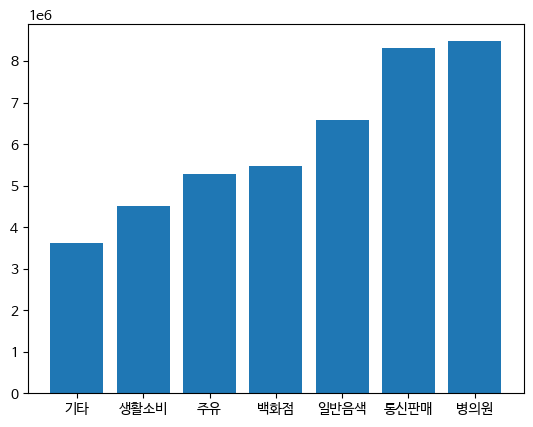

In [ ]:
import matplotlib.pyplot as plt

list_x = ['기타', '생활소비', '주유','백화점','일반음색','통신판매','병의원']
list_y = list(pd.DataFrame(c1.sum()).sort_values(0).tail(10)[0][:7])

plt.bar(list_x, list_y)

plt.show()

In [ ]:
col=['수신_요구불예금', '대출금액', '자산증식총금액', 'PG상품권', '가정주거', '가족문화', '건강',
       '골프', '교양', '교양 자녀교육', '국내여행', '기타', '농업', '대형할인점', '레저 취미', '백화점',
       '병의원', '뷰티', '상품권', '생활소비', '서적 문구', '약국', '용역', '유흥', '인테리어 수리',
       '일반음식', '자동이체', '정비', '제외', '주유', '출산', '택시', '통신판매', '판매', '패션잡화',
       '해외여행', '회원제']

In [ ]:
c1[col].corr()['병의원']

수신_요구불예금    0.043284
대출금액        0.017145
자산증식총금액    -0.010168
PG상품권      -0.010928
가정주거       -0.013188
가족문화       -0.001584
건강          0.073775
골프         -0.006479
교양         -0.008993
교양 자녀교육    -0.021832
국내여행        0.065058
기타          0.053574
농업          0.049165
대형할인점       0.054849
레저 취미       0.040893
백화점         0.006506
병의원         1.000000
뷰티          0.033278
상품권        -0.012546
생활소비        0.058457
서적 문구      -0.008208
약국          0.049079
용역         -0.008114
유흥         -0.021330
인테리어 수리    -0.004646
일반음식        0.026428
자동이체        0.000974
정비          0.007003
제외          0.026407
주유         -0.001500
출산               NaN
택시          0.053190
통신판매        0.096039
판매               NaN
패션잡화        0.009611
해외여행       -0.009036
회원제        -0.014455
Name: 병의원, dtype: float64

In [ ]:
c1h=c1[c1['병의원']!=0]
c1h['hos']=1

c1nh=c1[c1['병의원']==0]
c1nh['hos']=0

c1=pd.concat([c1h,c1nh])
c1_hos=c1.groupby('hos').mean()
c1_hos=c1_hos.transpose()

<ipython-input-65-b6dfe362d9ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c1h['hos']=1
<ipython-input-65-b6dfe362d9ae>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c1nh['hos']=0


In [ ]:
c1_hos['diff']=c1_hos[1]-c1_hos[0]
c1_hos.rename(columns={0:'병의원X',1:'병의원O'},inplace=True)
c1_hos.rename(columns={'diff':'병의원O-병의원X'},inplace=True)
c1_hos['O/X']=c1_hos['병의원O']/c1_hos['병의원X']

In [ ]:
## 병의원 결제 내역 유무에 따른 타 업종 소비 내역 분석
c1_hos.sort_values('O/X')

hos,병의원X,병의원O,병의원O-병의원X,O/X
교양,5.233225e+02,0.000000e+00,-5.233225e+02,0.000000
인테리어 수리,2.860918e+03,1.435176e+03,-1.425742e+03,0.501649
용역,2.167234e+03,1.155995e+03,-1.011238e+03,0.533397
서적 문구,1.381538e+03,7.407269e+02,-6.408107e+02,0.536161
가정주거,9.737901e+02,6.790185e+02,-2.947716e+02,0.697295
유흥,1.037669e+03,7.484630e+02,-2.892060e+02,0.721293
수신_요구불예금,1.596928e+06,1.343981e+06,-2.529468e+05,0.841604
자산증식총금액,3.270648e+06,3.117130e+06,-1.535188e+05,0.953062
cluster,1.000000e+00,1.000000e+00,0.000000e+00,1.000000
연령대_60대이상,1.000000e+00,1.000000e+00,0.000000e+00,1.000000


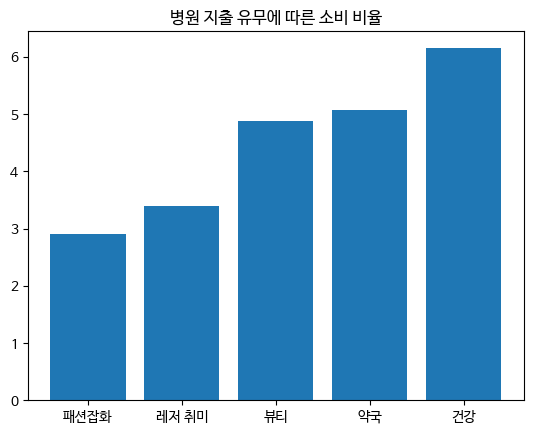

In [ ]:
list_x = ['패션잡화', '레저 취미', '뷰티','약국','건강']
list_y = [2.905566,3.394163,4.884018,5.073395,6.149378]

plt.bar(list_x, list_y)
plt.title('병원 지출 유무에 따른 소비 비율')

plt.show()

In [ ]:
#자산증식가능성 위주로 살펴보기
## 자산증식 가능성은 > 적금, 외화, 예금 등 미래 준비형 자산의 합으로 나타내짐

c11=c1[c1['자산증식총금액']>0]
c11['자산']=1

c12=c1[c1['자산증식총금액']==0]
c12['자산']=0

c1=pd.concat([c11,c12])

c1.groupby('자산').mean()
c1_자산=c1.groupby('자산').mean().transpose()

<ipython-input-90-40c10ad1eb21>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c11['자산']=1
<ipython-input-90-40c10ad1eb21>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c12['자산']=0


In [ ]:
c1_자산.rename(columns={0:'자산증식X',1:'자산증식O'},inplace=True)
c1_자산['O/X']=c1_자산['자산증식O']/c1_자산['자산증식X']

In [ ]:
c1_자산.sort_values('O/X')

자산,자산증식X,자산증식O,O/X
상품권,4.272221e+02,0.000000e+00,0.000000
회원제,4.967660e+01,0.000000e+00,0.000000
해외여행,4.570298e+02,0.000000e+00,0.000000
교양,4.570298e+02,0.000000e+00,0.000000
농업,1.440626e+02,0.000000e+00,0.000000
인테리어 수리,2.791848e+03,8.638626e+02,0.309423
유흥,1.077610e+03,3.562290e+02,0.330573
건강,9.041222e+02,3.562366e+02,0.394014
패션잡화,3.844057e+03,1.942328e+03,0.505281
용역,2.046241e+03,1.119588e+03,0.547144


In [ ]:
c2=df_list[1].drop('index',axis=1)

In [ ]:
#연령 60대 이상 / 성별 10 인 그룹



In [ ]:
#자산증식여부에 따른 비율

def future(df):
  df1=df[df['자산증식총금액']>0]
  df2=df[df['자산증식총금액']==0]

  df1['future']=1
  df2['future']=0

  df=pd.concat([df1,df2])
  ret=df.groupby('future').mean().transpose()
  ret.rename(columns={0:'자산증식X',1:'자산증식O'},inplace=True)
  ret['O/X']=ret['자산증식O']/ret['자산증식X']
  ret=ret.sort_values('O/X')

  return ret

In [ ]:
# 건강관련 = 건강+병의원+약국  더해 파생변수 생성한다면?

In [ ]:
c4=df_list[3].drop('index',axis=1)

In [ ]:
def info(df):
  print(len(df))
  return df.sum()

In [ ]:
info(c3)

In [ ]:
mean_list=[]
for i in range(len(df_list)):
  tmp=df_list[i].drop('index',axis=1)
  ret=pd.DataFrame(tmp.mean())
  ret.rename(columns={0:'cluster'+str(i+1)},inplace=True)
  ret=ret.transpose()
  mean_list.append(ret)

In [ ]:
cluster_mean=pd.concat(mean_list).transpose()

In [ ]:
cluster_mean['max_cluster']=''

In [ ]:
for i in range(len(list(cluster_mean.index))):
  a=cluster_mean.loc[list(cluster_mean.index)[i]]
  a=list(a)
  a.pop()
  val=a.index(max(a))+1
  cluster_mean['max_cluster'][i]='cluster'+str(val)

<ipython-input-224-54080bf92295>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_mean['max_cluster'][i]='cluster'+str(val)


In [ ]:
cluster_mean.to_excel('/content/drive/MyDrive/대구은행/소비패턴별군집.xlsx')

In [ ]:
c1=df_all[0].reset_index().drop('index',axis=1)
c2=df_all[1].reset_index().drop('index',axis=1)
c3=df_all[2].reset_index().drop('index',axis=1)
c4=df_all[3].reset_index().drop('index',axis=1)
c5=df_all[4].reset_index().drop('index',axis=1)
c6=df_all[5].reset_index().drop('index',axis=1)
c7=df_all[6].reset_index().drop('index',axis=1)
c8=df_all[7].reset_index().drop('index',axis=1)
c9=df_all[8].reset_index().drop('index',axis=1)
c10=df_all[9].reset_index().drop('index',axis=1)

In [ ]:
info(c5) #544건 30대의 남성

480


고객등급         4.910000e+02
수신_요구불예금     9.279000e+08
대출금액         1.093680e+09
자산증식총금액      1.417400e+09
PG상품권        8.499900e+04
가정주거         6.374350e+05
가족문화         1.690900e+05
건강           3.333000e+03
골프           2.167310e+05
교양           2.841670e+05
교양 자녀교육      2.573611e+06
국내여행         5.198190e+05
기타           1.599605e+06
농업           3.333000e+03
대형할인점        2.500151e+06
레저 취미        1.207666e+06
백화점          2.066806e+06
병의원          3.799955e+06
뷰티           1.034997e+06
상품권          3.008330e+05
생활소비         2.687647e+06
서적 문구        4.433360e+05
약국           1.188352e+06
용역           8.055500e+05
유흥           3.983340e+05
인테리어 수리      3.933320e+05
일반음식         3.587168e+06
자동이체         1.904999e+06
정비           1.371107e+06
제외           2.281670e+05
주유           2.969303e+06
출산           0.000000e+00
택시           4.777940e+05
통신판매         5.049786e+06
판매           1.600000e+05
패션잡화         9.070830e+05
해외여행         3.999900e+04
회원제          6.666000e+03
연령대_10대미만   

In [ ]:
info(c1) # 60대 여성 고객이 전부를 차지함 802건
info(c2) # 60대 남성 고객이 전부를 차지함 809건
info(c3) # 30대 남성 고객이 전부를 차지함 544건
info(c4) # 50대 남성 고객이 전부를 차지함 574건
info(c5) # 50대 여성 고객이 전부를 차지함 472 여성 8 알수 없음
info(c6) # 10대 미만 남성 115 20대 남성이 523건을 차지함
info(c7) # 40대 여성 547건 전부
info(c8) # 40대 남성 536건 전부
info(c9) # 30대 여성 428건
info(c10)# 10대 미만 여성 114건 20대이상 330건 기타 7건 451건

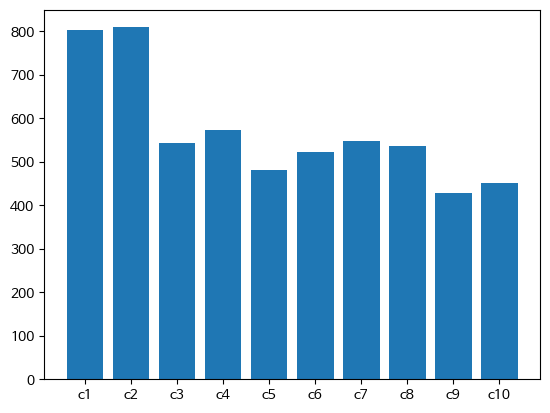

In [ ]:
xticks=['c1','c2','c3','c4','c5','c6','c7','c8','c9','c10']
yticks=[802,809,544,574,480,523,547,536,428,451]

plt.bar(xticks, yticks)

plt.show()

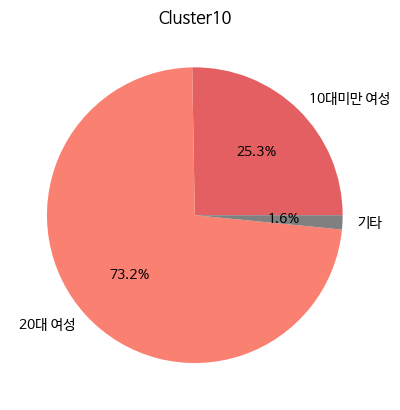

In [ ]:
import matplotlib.pyplot as plt

ratio = [114,330,7]
labels = ['10대미만 여성','20대 여성','기타']
color=['#e35f62','salmon','gray']

plt.pie(ratio, labels=labels,colors=color,autopct='%.1f%%')
plt.title('Cluster10')
plt.show()


#업종별 관련성
#20,30대 타게팅
#쇼핑업종이랑 취미생활 업종이랑 연관성 발견

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/대구은행/minmax_kmeans후_decode.csv')

In [ ]:
df.columns

Index(['Unnamed: 0', '고객등급', '수신_요구불예금', '대출금액', '자산증식총금액', 'PG상품권', '가정주거',
       '가족문화', '건강', '골프', '교양', '교양 자녀교육', '국내여행', '기타', '농업', '대형할인점',
       '레저 취미', '백화점', '병의원', '뷰티', '상품권', '생활소비', '서적 문구', '약국', '용역', '유흥',
       '인테리어 수리', '일반음식', '자동이체', '정비', '제외', '주유', '출산', '택시', '통신판매', '판매',
       '패션잡화', '해외여행', '회원제', '연령대_10대미만', '연령대_20대', '연령대_30대', '연령대_40대',
       '연령대_50대', '연령대_60대이상', '연령대_기타', '성별_10', '성별_20', '성별_해당사항없음',
       'cluster'],
      dtype='object')

# 2030트랜드 분석

# data_read 및 2030 뽑아오기

In [ ]:
df_check=pd.read_csv('/content/drive/MyDrive/대구은행/minmax_kmeans후_decode.csv')

In [ ]:
df_check=df_check[(df_check['연령대_20대']==1) | (df_check['연령대_30대']==1)]

In [ ]:
#필요없는 데이터 삭제
drop_col=[ '연령대_10대미만', '연령대_20대', '연령대_30대', '연령대_40대',
       '연령대_50대', '연령대_60대이상', '연령대_기타', '성별_10', '성별_20', '성별_해당사항없음',
       'cluster']

In [ ]:
df.drop(drop_col,axis=1,inplace=True)

<ipython-input-278-4a3b257ce4e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(drop_col,axis=1,inplace=True)


In [ ]:
df=df.reset_index()
df.drop(['index','Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df['고객등급'].value_counts()

1.0    1702
2.0       7
Name: 고객등급, dtype: int64

In [ ]:
num_col=['고객등급', '수신_요구불예금', '대출금액', '자산증식총금액', 'PG상품권', '가정주거', '가족문화', '건강',
       '골프', '교양', '교양 자녀교육', '국내여행', '기타', '농업', '대형할인점', '레저 취미', '백화점',
       '병의원', '뷰티', '상품권', '생활소비', '서적 문구', '약국', '용역', '유흥', '인테리어 수리',
       '일반음식', '자동이체', '정비', '제외', '주유', '출산', '택시', '통신판매', '판매', '패션잡화',
       '해외여행', '회원제']

lst=[]
for i in num_col:
  lst.append([i,df[i].min(),df[i].max()])

minmax2030=pd.DataFrame(lst)
minmax2030.rename(columns={0:'col',1:'min',2:'max'},inplace=True)
minmax2030.to_excel('/content/drive/MyDrive/대구은행/minmax2030.xlsx')

In [ ]:
#minmax_scale

from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
df[num_col]=mms.fit_transform(df[num_col])

In [ ]:
df.drop('고객등급',axis=1,inplace=True)

# kmeans

In [ ]:
#kmeans

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

ks=[]

for i in range(1,21):
  model=KMeans(n_clusters=i,random_state=777)
  model.fit(df)
  ks.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

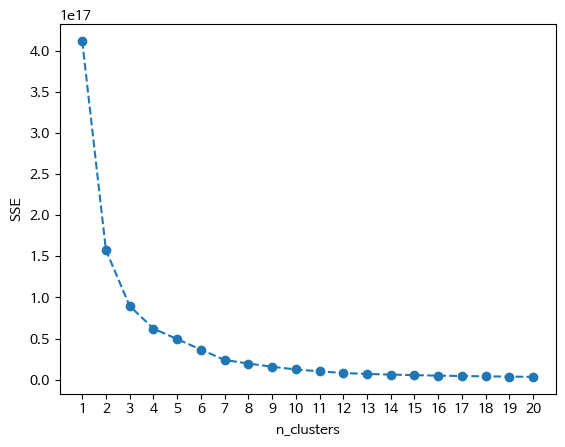

In [ ]:
import numpy as np

plt.plot(range(1,21),ks,linestyle='--',marker='o')
plt.xlabel('n_clusters')
plt.ylabel('SSE')
plt.xticks(np.arange(1, 21, 1))
plt.show()

In [ ]:
model=KMeans(n_clusters=5,random_state=777)
model.fit(df)
pred=model.predict(df)
df['cluster']=pred
df['cluster']=df['cluster']+1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df['cluster'].value_counts()

2    1656
5      22
1      14
3      12
4       5
Name: cluster, dtype: int64

# minmax해제

In [ ]:
#고객등급 없애기
minmax2030.drop(0,axis=0,inplace=True)
#출산없애기
minmax2030.drop(30,axis=0,inplace=True)
#minmax풀어주기
for i in range(len(minmax2030)):
  df[minmax2030.loc[i][0]]=df[minmax2030.loc[i][0]]*(minmax2030.loc[i][2]-minmax2030.loc[i][1])+minmax2030.loc[i][1]

In [ ]:
df['cluster'].value_counts()

2    1656
5      22
1      14
3      12
4       5
Name: cluster, dtype: int64

In [ ]:
df.columns

Index(['수신_요구불예금', '대출금액', '자산증식총금액', 'PG상품권', '가정주거', '가족문화', '건강', '골프',
       '교양', '교양 자녀교육', '국내여행', '기타', '농업', '대형할인점', '레저 취미', '백화점', '병의원',
       '뷰티', '상품권', '생활소비', '서적 문구', '약국', '용역', '유흥', '인테리어 수리', '일반음식',
       '자동이체', '정비', '제외', '주유', '택시', '통신판매', '판매', '패션잡화', '해외여행', '회원제',
       'cluster'],
      dtype='object')

In [ ]:
df.to_csv('/content/drive/MyDrive/대구은행/2030.csv')

# 전체 corr

In [ ]:
#상관변수 알아보기
cor_col=['수신_요구불예금', '대출금액', '자산증식총금액', 'PG상품권', '가정주거', '가족문화', '건강',
       '골프', '교양', '교양 자녀교육', '국내여행', '기타', '농업', '대형할인점', '레저 취미', '백화점',
       '병의원', '뷰티', '상품권', '생활소비', '서적 문구', '약국', '용역', '유흥', '인테리어 수리',
       '일반음식', '자동이체', '정비', '제외', '주유', '택시', '통신판매', '판매', '패션잡화',
       '해외여행', '회원제']

df_corr=df[cor_col].corr()

corr_list=[]
for i in df_corr:
  for cate,val in dict(df_corr.loc[i]).items():
    if val>0.1 and val!=1:
      corr_list.append([i,cate,val])

corr_df=pd.DataFrame(corr_list)
corr_df.rename(columns={0:'cate1',1:'cate2',2:'corr'},inplace=True)

corr_df.drop_duplicates(subset='corr')

In [ ]:
corr_df.to_csv('/content/drive/MyDrive/대구은행/2030전체corr>0.1.csv')

# 클러스터별 corr

In [ ]:
df_all=[]
dflist=[]

for k in range(1,6):
  for i in range(len(df)):
    if df['cluster'][i]==k:
      dflist.append(df.loc[i])
  df_all.append(pd.DataFrame(dflist))
  dflist=[]

In [ ]:
c1=df_all[0].reset_index()
c1.drop('index',axis=1,inplace=True)

c2=df_all[1].reset_index()
c2.drop('index',axis=1,inplace=True)

c3=df_all[2].reset_index()
c3.drop('index',axis=1,inplace=True)

c4=df_all[3].reset_index()
c4.drop('index',axis=1,inplace=True)

c5=df_all[4].reset_index()
c5.drop('index',axis=1,inplace=True)

In [ ]:
def corr(df):

  cor_col=['수신_요구불예금', '대출금액', '자산증식총금액', 'PG상품권', '가정주거', '가족문화', '건강',
        '골프', '교양', '교양 자녀교육', '국내여행', '기타', '농업', '대형할인점', '레저 취미', '백화점',
        '병의원', '뷰티', '상품권', '생활소비', '서적 문구', '약국', '용역', '유흥', '인테리어 수리',
        '일반음식', '자동이체', '정비', '제외', '주유', '택시', '통신판매', '판매', '패션잡화',
        '해외여행', '회원제']

  df_corr=df[cor_col].corr()

  corr_list=[]
  for i in df_corr:
    for cate,val in dict(df_corr.loc[i]).items():
      if val>0.1 and val!=1:
        corr_list.append([i,cate,val])

  corr_df=pd.DataFrame(corr_list)
  corr_df.rename(columns={0:'cate1',1:'cate2',2:'corr'},inplace=True)

  corr_df=corr_df.drop_duplicates(subset='corr')
  corr_df=corr_df.sort_values('corr')

  return corr_df

In [ ]:
corr(c1)

,cate1,cate2,corr
62,약국,유흥,0.101608
28,레저 취미,일반음식,0.106468
6,자산증식총금액,용역,0.120470
105,주유,패션잡화,0.134459
69,용역,일반음식,0.140591
40,병의원,주유,0.145390
34,백화점,주유,0.150816
1,수신_요구불예금,생활소비,0.202520
15,기타,생활소비,0.204348
53,생활소비,유흥,0.224193


# cluster별 평균 차이보기

In [ ]:
a=pd.DataFrame(c1.mean()).transpose()
b=pd.DataFrame(c2.mean()).transpose()
c=pd.DataFrame(c3.mean()).transpose()
d=pd.DataFrame(c4.mean()).transpose()
e=pd.DataFrame(c5.mean()).transpose()

mean_diff=pd.concat([a,b,c,d,e])

In [ ]:
mean_diff=mean_diff.transpose()

In [ ]:
mean_diff

,0,0,0,0,0
수신_요구불예금,3.307143e+06,690458.937198,3.916667e+05,3440000.0,2.586364e+06
대출금액,1.735714e+06,153315.217391,8.497500e+07,216000000.0,3.043636e+07
자산증식총금액,4.478571e+07,324879.227053,7.750000e+05,200000.0,1.931818e+06
PG상품권,1.190500e+03,428.266304,0.000000e+00,0.0,0.000000e+00
가정주거,0.000000e+00,1418.829710,5.555833e+02,0.0,0.000000e+00
가족문화,2.380714e+02,336.817633,0.000000e+00,0.0,3.030318e+03
건강,0.000000e+00,217.391304,4.722250e+03,0.0,0.000000e+00
골프,0.000000e+00,968.666063,0.000000e+00,0.0,1.212136e+03
교양,0.000000e+00,98.631643,0.000000e+00,0.0,0.000000e+00
교양 자녀교육,0.000000e+00,3029.974034,0.000000e+00,66666.6,1.333332e+04


In [ ]:
mean_diff=mean_diff.transpose()

In [ ]:
mean_diff['max_cluster']=''

In [ ]:
for i in range(len(list(mean_diff.index))):
  a=mean_diff.loc[list(mean_diff.index)[i]]
  a=list(a)
  a.pop()
  val=a.index(max(a))+1
  mean_diff['max_cluster'][i]='cluster'+str(val)

<ipython-input-489-eb09bd1f2718>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean_diff['max_cluster'][i]='cluster'+str(val)


In [ ]:
mean_diff.columns=['cluster1','cluster2','cluster3','cluster4','cluster5','max_cluster']

In [ ]:
mean_diff['max_cluster'][0][-1]

'4'

In [ ]:
mean_diff['mean_raito']=0

In [ ]:
for i in range(len(mean_diff)):
  num_list=[1,2,3,4,5]
  num=int(mean_diff['max_cluster'][i][-1])
  num_list.pop(num_list.index(num))
  sum=0
  for go in num_list:
    sum+=mean_diff['cluster'+str(go)][i]
  mean=int(sum)/4
  mean_diff['mean_raito'][i]=mean_diff['cluster'+str(num)][i]/mean

<ipython-input-500-c9969da958b9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean_diff['mean_raito'][i]=mean_diff['cluster'+str(num)][i]/mean
<ipython-input-500-c9969da958b9>:9: RuntimeWarning: divide by zero encountered in double_scalars
  mean_diff['mean_raito'][i]=mean_diff['cluster'+str(num)][i]/mean


In [ ]:
mean_diff.to_csv('/content/drive/MyDrive/대구은행/2030평균비교.csv')

In [ ]:
mean_diff

,cluster1,cluster2,cluster3,cluster4,cluster5,max_cluster,mean_raito
수신_요구불예금,3.307143e+06,690458.937198,3.916667e+05,3440000.0,2.586364e+06,cluster4,1.972581
대출금액,1.735714e+06,153315.217391,8.497500e+07,216000000.0,3.043636e+07,cluster4,7.365704
자산증식총금액,4.478571e+07,324879.227053,7.750000e+05,200000.0,1.931818e+06,cluster1,55.433061
PG상품권,1.190500e+03,428.266304,0.000000e+00,0.0,0.000000e+00,cluster1,11.126168
가정주거,0.000000e+00,1418.829710,5.555833e+02,0.0,0.000000e+00,cluster2,10.225800
가족문화,2.380714e+02,336.817633,0.000000e+00,0.0,3.030318e+03,cluster5,21.117200
건강,0.000000e+00,217.391304,4.722250e+03,0.0,0.000000e+00,cluster3,87.046083
골프,0.000000e+00,968.666063,0.000000e+00,0.0,1.212136e+03,cluster5,5.008828
교양,0.000000e+00,98.631643,0.000000e+00,0.0,0.000000e+00,cluster2,inf
교양 자녀교육,0.000000e+00,3029.974034,0.000000e+00,66666.6,1.333332e+04,cluster4,16.296914


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 37 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   수신_요구불예금  14 non-null     float64
 1   대출금액      14 non-null     float64
 2   자산증식총금액   14 non-null     float64
 3   PG상품권     14 non-null     float64
 4   가정주거      14 non-null     float64
 5   가족문화      14 non-null     float64
 6   건강        14 non-null     float64
 7   골프        14 non-null     float64
 8   교양        14 non-null     float64
 9   교양 자녀교육   14 non-null     float64
 10  국내여행      14 non-null     float64
 11  기타        14 non-null     float64
 12  농업        14 non-null     float64
 13  대형할인점     14 non-null     float64
 14  레저 취미     14 non-null     float64
 15  백화점       14 non-null     float64
 16  병의원       14 non-null     float64
 17  뷰티        14 non-null     float64
 18  상품권       14 non-null     float64
 19  생활소비      14 non-null     float64
 20  서적 문구     14 non-null     float64


# CLUSTER1

In [ ]:
def corr(df):

  cor_col=['수신_요구불예금', '대출금액', '자산증식총금액', 'PG상품권', '가정주거', '가족문화', '건강',
        '골프', '교양', '교양 자녀교육', '국내여행', '기타', '농업', '대형할인점', '레저 취미', '백화점',
        '병의원', '뷰티', '상품권', '생활소비', '서적 문구', '약국', '용역', '유흥', '인테리어 수리',
        '일반음식', '자동이체', '정비', '제외', '주유', '택시', '통신판매', '판매', '패션잡화',
        '해외여행', '회원제']

  df_corr=df[cor_col].corr()

  corr_list=[]
  for i in df_corr:
    for cate,val in dict(df_corr.loc[i]).items():
      if val>0.5 and val!=1:
        corr_list.append([i,cate,val])

  corr_df=pd.DataFrame(corr_list)
  corr_df.rename(columns={0:'cate1',1:'cate2',2:'corr'},inplace=True)

  corr_df=corr_df.drop_duplicates(subset='corr')
  corr_df=corr_df.sort_values('corr')

  return corr_df

In [ ]:
corr(c1)

,cate1,cate2,corr
11,기타,용역,0.504774
7,가족문화,기타,0.531077
43,일반음식,주유,0.545106
33,생활소비,정비,0.584581
16,레저 취미,패션잡화,0.586080
27,뷰티,생활소비,0.586322
34,생활소비,주유,0.597916
13,레저 취미,백화점,0.603031
19,백화점,약국,0.619088
29,뷰티,일반음식,0.620703


In [ ]:
c1.sum().sum()

698335212.0

In [ ]:
df.sum().sum()

5684169018.0

# CLUSTER2

In [ ]:
def corr(df):

  cor_col=['수신_요구불예금', '대출금액', '자산증식총금액', 'PG상품권', '가정주거', '가족문화', '건강',
        '골프', '교양', '교양 자녀교육', '국내여행', '기타', '농업', '대형할인점', '레저 취미', '백화점',
        '병의원', '뷰티', '상품권', '생활소비', '서적 문구', '약국', '용역', '유흥', '인테리어 수리',
        '일반음식', '자동이체', '정비', '제외', '주유', '택시', '통신판매', '판매', '패션잡화',
        '해외여행', '회원제']

  df_corr=df[cor_col].corr()

  corr_list=[]
  for i in df_corr:
    for cate,val in dict(df_corr.loc[i]).items():
      if val>0.1 and val!=1:
        corr_list.append([i,cate,val])

  corr_df=pd.DataFrame(corr_list)
  corr_df.rename(columns={0:'cate1',1:'cate2',2:'corr'},inplace=True)

  corr_df=corr_df.drop_duplicates(subset='corr')
  corr_df=corr_df.sort_values('corr')

  return corr_df

In [ ]:
mean_diff

,cluster1,cluster2,cluster3,cluster4,cluster5,max_cluster,mean_raito
수신_요구불예금,3.307143e+06,690458.937198,3.916667e+05,3440000.0,2.586364e+06,cluster4,1.972581
대출금액,1.735714e+06,153315.217391,8.497500e+07,216000000.0,3.043636e+07,cluster4,7.365704
자산증식총금액,4.478571e+07,324879.227053,7.750000e+05,200000.0,1.931818e+06,cluster1,55.433061
PG상품권,1.190500e+03,428.266304,0.000000e+00,0.0,0.000000e+00,cluster1,11.126168
가정주거,0.000000e+00,1418.829710,5.555833e+02,0.0,0.000000e+00,cluster2,10.225800
가족문화,2.380714e+02,336.817633,0.000000e+00,0.0,3.030318e+03,cluster5,21.117200
건강,0.000000e+00,217.391304,4.722250e+03,0.0,0.000000e+00,cluster3,87.046083
골프,0.000000e+00,968.666063,0.000000e+00,0.0,1.212136e+03,cluster5,5.008828
교양,0.000000e+00,98.631643,0.000000e+00,0.0,0.000000e+00,cluster2,inf
교양 자녀교육,0.000000e+00,3029.974034,0.000000e+00,66666.6,1.333332e+04,cluster4,16.296914


In [ ]:
len(c2)/len(df)

0.9689877121123464

In [ ]:
c2.sum().sum()/df.sum().sum()

0.3660503720792069

In [ ]:
c2.sum().sum()

2080692184.0

In [ ]:
df.sum().sum()

5684169018.0

In [ ]:
corr(c2)

,cate1,cate2,corr
7,교양 자녀교육,서적 문구,0.102389
35,생활소비,일반음식,0.102483
2,가족문화,회원제,0.102710
43,일반음식,주유,0.103005
9,국내여행,레저 취미,0.103139
27,뷰티,생활소비,0.104624
41,유흥,주유,0.105523
17,대형할인점,약국,0.107533
15,대형할인점,뷰티,0.109600
40,약국,주유,0.111646


# CLUSTER 3

In [ ]:
def corr(df):

  cor_col=['수신_요구불예금', '대출금액', '자산증식총금액', 'PG상품권', '가정주거', '가족문화', '건강',
        '골프', '교양', '교양 자녀교육', '국내여행', '기타', '농업', '대형할인점', '레저 취미', '백화점',
        '병의원', '뷰티', '상품권', '생활소비', '서적 문구', '약국', '용역', '유흥', '인테리어 수리',
        '일반음식', '자동이체', '정비', '제외', '주유', '택시', '통신판매', '판매', '패션잡화',
        '해외여행', '회원제']

  df_corr=df[cor_col].corr()

  corr_list=[]
  for i in df_corr:
    for cate,val in dict(df_corr.loc[i]).items():
      if val>0.5 and val!=1:
        corr_list.append([i,cate,val])

  corr_df=pd.DataFrame(corr_list)
  corr_df.rename(columns={0:'cate1',1:'cate2',2:'corr'},inplace=True)

  corr_df=corr_df.drop_duplicates(subset='corr')
  corr_df=corr_df.sort_values('corr')

  return corr_df

In [ ]:
corr(c3)

,cate1,cate2,corr
60,생활소비,일반음식,0.566035
25,기타,일반음식,0.567229
5,자산증식총금액,약국,0.570595
40,백화점,뷰티,0.598331
61,생활소비,통신판매,0.636939
66,약국,제외,0.653200
21,국내여행,백화점,0.658191
43,백화점,주유,0.658191
12,가정주거,제외,0.674200
10,가정주거,백화점,0.689898


In [ ]:
len(c3)/len(df)

0.007021650087770626

In [ ]:
(c1.sum().sum()+c2.sum().sum()+c3.sum().sum()+c4.sum().sum()+c5.sum().sum())/df.sum().sum()

1.0

In [ ]:
c3.sum().sum()

1034585209.0

# CLUSTER 4

In [ ]:
mean_diff

In [ ]:
c4.sum().sum()/df.sum().sum()

0.19337118046970783

In [ ]:
c4.sum().sum()

1099154473.0

In [ ]:
def corr(df):

  cor_col=['수신_요구불예금', '대출금액', '자산증식총금액', 'PG상품권', '가정주거', '가족문화', '건강',
        '골프', '교양', '교양 자녀교육', '국내여행', '기타', '농업', '대형할인점', '레저 취미', '백화점',
        '병의원', '뷰티', '상품권', '생활소비', '서적 문구', '약국', '용역', '유흥', '인테리어 수리',
        '일반음식', '자동이체', '정비', '제외', '주유', '택시', '통신판매', '판매', '패션잡화',
        '해외여행', '회원제']

  df_corr=df[cor_col].corr()

  corr_list=[]
  for i in df_corr:
    for cate,val in dict(df_corr.loc[i]).items():
      if val>0.5 and val!=1:
        corr_list.append([i,cate,val])

  corr_df=pd.DataFrame(corr_list)
  corr_df.rename(columns={0:'cate1',1:'cate2',2:'corr'},inplace=True)

  corr_df=corr_df.drop_duplicates(subset='corr')
  corr_df=corr_df.sort_values('corr')

  return corr_df

In [ ]:
corr(c4)

,cate1,cate2,corr
2,대출금액,병의원,0.612372
0,수신_요구불예금,대출금액,0.642908
4,자산증식총금액,통신판매,0.947954
9,대형할인점,일반음식,0.984288
8,기타,일반음식,0.984288
3,자산증식총금액,교양 자녀교육,1.000000
7,교양 자녀교육,패션잡화,1.000000


# CLUSTER5

In [ ]:
len(c5)/len(df)

0.012873025160912814

In [ ]:
c5.sum().sum()/df.sum().sum()

0.13571059156707152

In [ ]:
c5.sum().sum()

771401940.0

In [ ]:
mean_diff

In [ ]:
def corr(df):

  cor_col=['수신_요구불예금', '대출금액', '자산증식총금액', 'PG상품권', '가정주거', '가족문화', '건강',
        '골프', '교양', '교양 자녀교육', '국내여행', '기타', '농업', '대형할인점', '레저 취미', '백화점',
        '병의원', '뷰티', '상품권', '생활소비', '서적 문구', '약국', '용역', '유흥', '인테리어 수리',
        '일반음식', '자동이체', '정비', '제외', '주유', '택시', '통신판매', '판매', '패션잡화',
        '해외여행', '회원제']

  df_corr=df[cor_col].corr()

  corr_list=[]
  for i in df_corr:
    for cate,val in dict(df_corr.loc[i]).items():
      if val>0.5 and val!=1:
        corr_list.append([i,cate,val])

  corr_df=pd.DataFrame(corr_list)
  corr_df.rename(columns={0:'cate1',1:'cate2',2:'corr'},inplace=True)

  corr_df=corr_df.drop_duplicates(subset='corr')
  corr_df=corr_df.sort_values('corr')

  return corr_df

In [ ]:
corr(c5)

,cate1,cate2,corr
21,생활소비,자동이체,0.521211
7,국내여행,생활소비,0.561899
0,자산증식총금액,교양 자녀교육,0.575635
1,자산증식총금액,서적 문구,0.575635
19,뷰티,해외여행,0.586751
18,뷰티,통신판매,0.667184
10,대형할인점,뷰티,0.673846
12,레저 취미,자동이체,0.675166
9,기타,백화점,0.730597
2,가족문화,기타,0.808321


In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats

In [ ]:
data={'p1': [7,0],'p2':[8,15]}

In [ ]:
data=[[7,0],[8,15]]

In [ ]:
data

[[7, 0], [8, 15]]

In [ ]:
stats.fisher_exact(data,alternative='greater')

SignificanceResult(statistic=inf, pvalue=0.003160919540229885)